In [1]:
import warnings
warnings.filterwarnings('ignore')
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [48]:
from keras.models import load_model
import keras

classifier = load_model('./Trained Models/creditcard.h5')


In [49]:
def x_cord_contour(contours):
    #Returns the X cordinate for the contour centroid
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return (int(M['m10']/M['m00']))
    else:
        pass

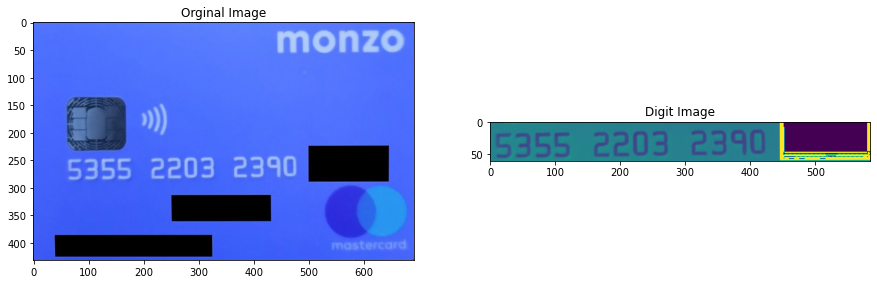

In [60]:
img = cv2.imread('credit_card_extracted_digits.jpg')
orig_img = cv2.imread('credit_card_color.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.figure( figsize = (15 , 7 ) )
plt.subplot( 1 , 2 , 1 )
plt.title('Orginal Image' )
plt.imshow( orig_img)

plt.subplot( 1 , 2 , 2 )
plt.title('Digit Image' )
plt.imshow( gray)

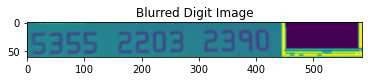

In [61]:
# Blur image then find edges using Canny 
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.title('Blurred Digit Image' )
plt.imshow( blurred)

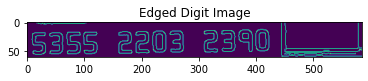

In [62]:
edged = cv2.Canny(blurred, 30, 150)
plt.title('Edged Digit Image' )
plt.imshow( edged)

In [63]:
# Find Contours
_, contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Sort out contours left to right by using their x cordinates
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:13] #Change this to 16 to get all digits
contours = sorted(contours, key = x_cord_contour, reverse = False)[:-1]

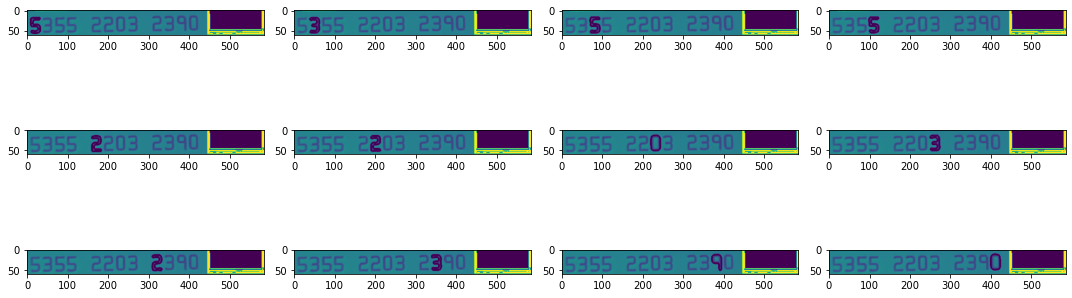

In [64]:
plt.figure( figsize = (15 , 7 ) )
i = 1
for c in contours:
#     (x, y, w, h) = cv2.boundingRect(c)
    gray_temp = gray.copy()
    cv2.drawContours(gray_temp , [c] ,  -1, (0, 255, 0), 3 )
    plt.subplot( 4 , 4 , i )
    plt.imshow( gray_temp )
    i = i + 1 
plt.tight_layout()
plt.show()

In [65]:
def pre_process(image, inv = False):
    """Uses OTSU binarization on an image"""
    try:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    except:
        gray_image = image
        pass
    
    if inv == False:
        _, th2 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    else:
        _, th2 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    resized = cv2.resize(th2, (32,32), interpolation = cv2.INTER_AREA)
    return resized

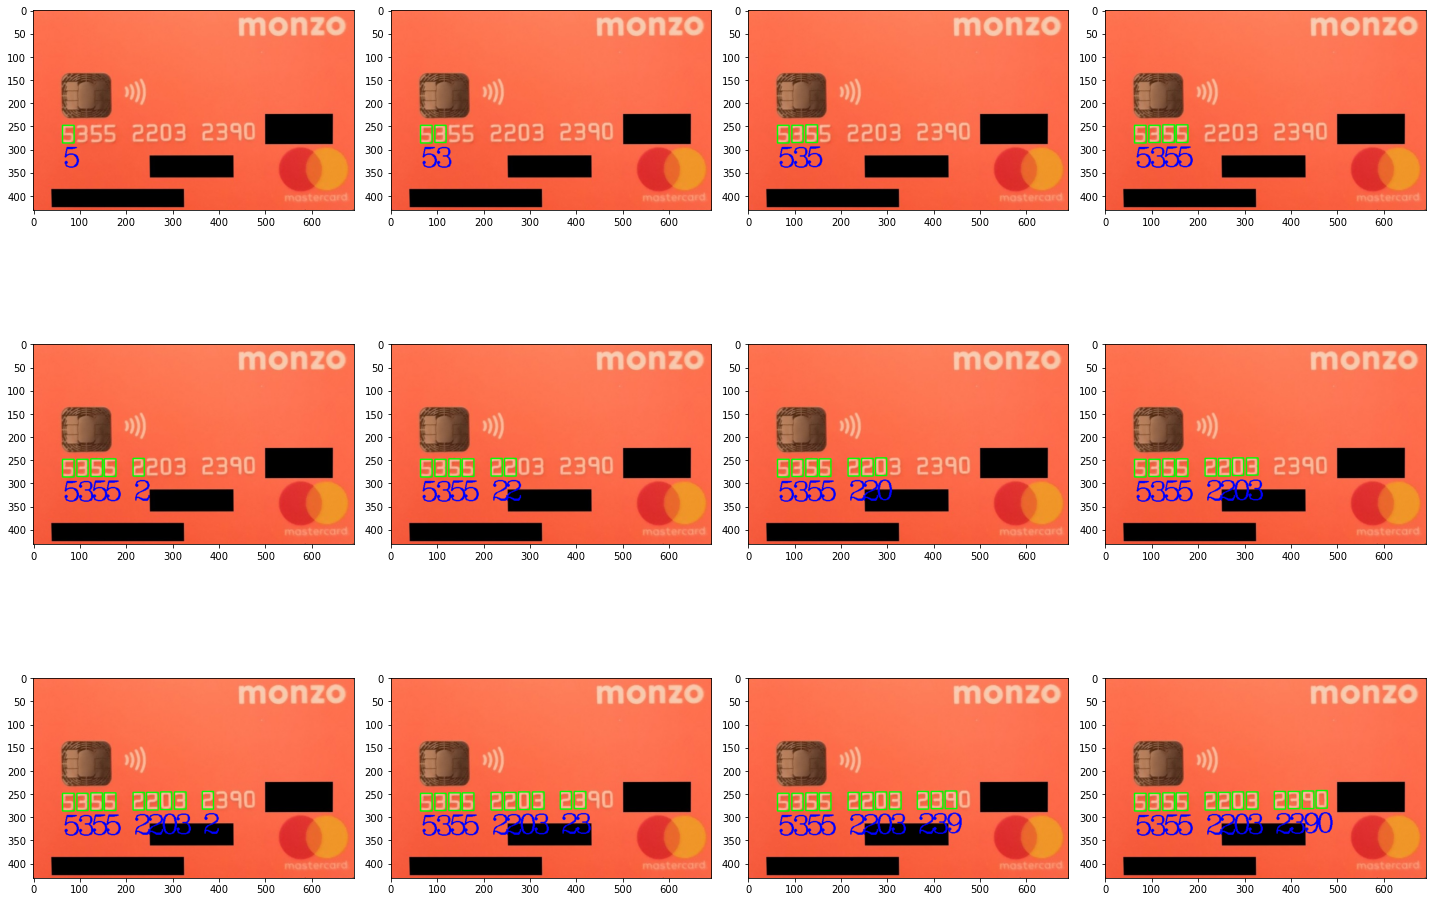

In [66]:
# Create empty array to store entire number
plt.figure( figsize = (20 , 15 ) )
full_number = []
region = [(55, 230), (640, 290)]
j = 1 
for c in contours:
    # compute the bounding box for the rectangle
    (x, y, w, h) = cv2.boundingRect(c)    
    if w >= 5 and h >= 25 and cv2.contourArea(c) < 1000:
        roi = blurred[y:y + h, x:x + w]
        roi_otsu = pre_process(roi, True)
        roi_otsu = cv2.cvtColor(roi_otsu, cv2.COLOR_GRAY2RGB)
        roi_otsu = keras.preprocessing.image.img_to_array(roi_otsu)
        roi_otsu = roi_otsu * 1./255
        roi_otsu = np.expand_dims(roi_otsu, axis=0)
        image = np.vstack([roi_otsu])
        label = str(classifier.predict_classes(image, batch_size = 10))[1]
        full_number.append( label )
        (x, y, w, h) = (x+region[0][0], y+region[0][1], w, h)
        cv2.rectangle(orig_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(orig_img, label, (x , y + 90), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0), 2)
        plt.subplot( 3 , 4 , j )
        plt.imshow( cv2.cvtColor( orig_img , cv2.COLOR_BGR2RGB ) )
        j = j + 1
plt.tight_layout()
plt.show()

# Number in Credit card

In [68]:
''.join( full_number )

'535522032390'

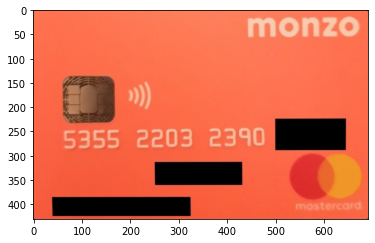

In [70]:
orig_img = cv2.imread('credit_card_color.jpg')
plt.imshow( cv2.cvtColor( orig_img , cv2.COLOR_BGR2RGB ) )